In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Posterior Inference vs Point Inference

In [2]:
data = pd.read_csv('hyperparameters_emb512.csv')

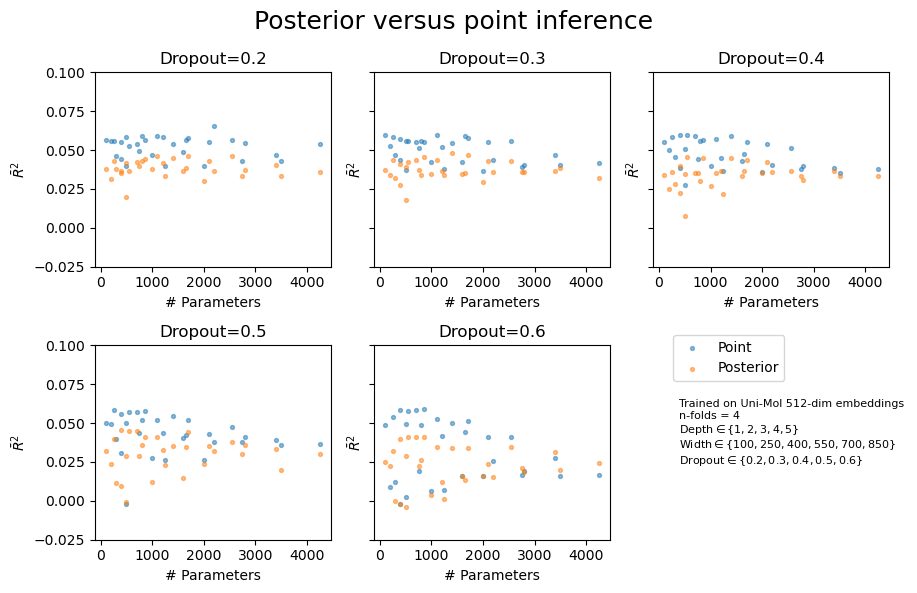

In [3]:
dropouts = np.unique(data['dropout'])

n_rows = n_cols = int(len(dropouts) ** 0.5)
while (n_rows * n_cols) < len(dropouts): n_cols += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
axs = [axs] if len(dropouts) == 1 else axs.flatten()

for ax, dropout in zip(axs, dropouts):
    
    _data = data[data['dropout'] == dropout]
    
    n_parameters = _data['depth'] * _data['width']
    
    ax.scatter(n_parameters, _data['mlp'], s=8, alpha=0.5, label='Point')
    ax.scatter(n_parameters, _data['vmlp'], s=8, alpha=0.5, label='Posterior')
    ax.set_ylim((-0.025, 0.1))
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.set_ylabel('$\\bar{R}^2$')

for ax in axs[-(n_rows * n_cols - len(dropouts)):]: ax.axis('off')

fig.suptitle(f'Posterior versus point inference', fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.875, 0.35), loc='lower right')

txt = 'Trained on Uni-Mol 512-dim embeddings \n'
txt += 'n-folds = 4 \n'
txt += 'Depth$\\in \{1, 2, 3, 4, 5\}$\n'
txt += 'Width$\\in \{100, 250, 400, 550, 700, 850\}$\n'
txt += 'Dropout$\\in \{0.2, 0.3, 0.4, 0.5, 0.6\}$\n'
fig.text(0.75, 0.2, txt, fontsize=8)

plt.tight_layout()

## Skip Connections

In [2]:
data = pd.read_csv('hyperparameters_emb512.csv')

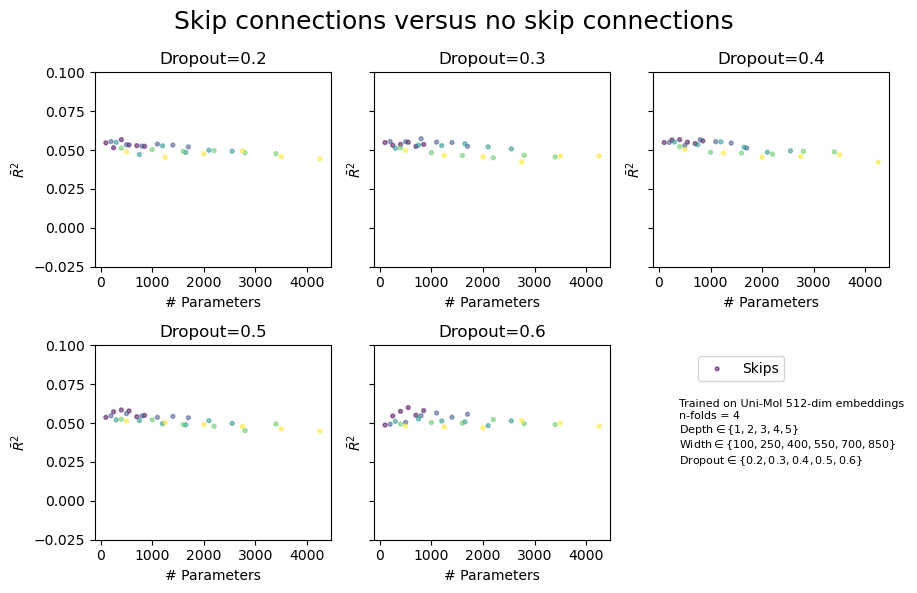

In [5]:
dropouts = np.unique(data['dropout'])

n_rows = n_cols = int(len(dropouts) ** 0.5)
while (n_rows * n_cols) < len(dropouts): n_cols += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
axs = [axs] if len(dropouts) == 1 else axs.flatten()

for ax, dropout in zip(axs, dropouts):
     
    _data = data[data['dropout'] == dropout]
    
    n_parameters = _data['depth'] * _data['width']
    
    #ax.scatter(n_parameters, _data['mlp'], s=8, alpha=0.5, label='No skips')
    ax.scatter(n_parameters, _data['rmlp'], s=8, alpha=0.5, c=_data['depth'], label='Skips')
    ax.set_ylim((-0.025, 0.1))
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.set_ylabel('$\\bar{R}^2$')

for ax in axs[-(n_rows * n_cols - len(dropouts)):]: ax.axis('off')

fig.suptitle(f'Skip connections versus no skip connections', fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.875, 0.35), loc='lower right')

txt = 'Trained on Uni-Mol 512-dim embeddings \n'
txt += 'n-folds = 4 \n'
txt += 'Depth$\\in \{1, 2, 3, 4, 5\}$\n'
txt += 'Width$\\in \{100, 250, 400, 550, 700, 850\}$\n'
txt += 'Dropout$\\in \{0.2, 0.3, 0.4, 0.5, 0.6\}$\n'
fig.text(0.75, 0.2, txt, fontsize=8)

plt.tight_layout()

## Posterior Inference + Skip Connections

In [6]:
data = pd.read_csv('hyperparameters_emb512.csv')

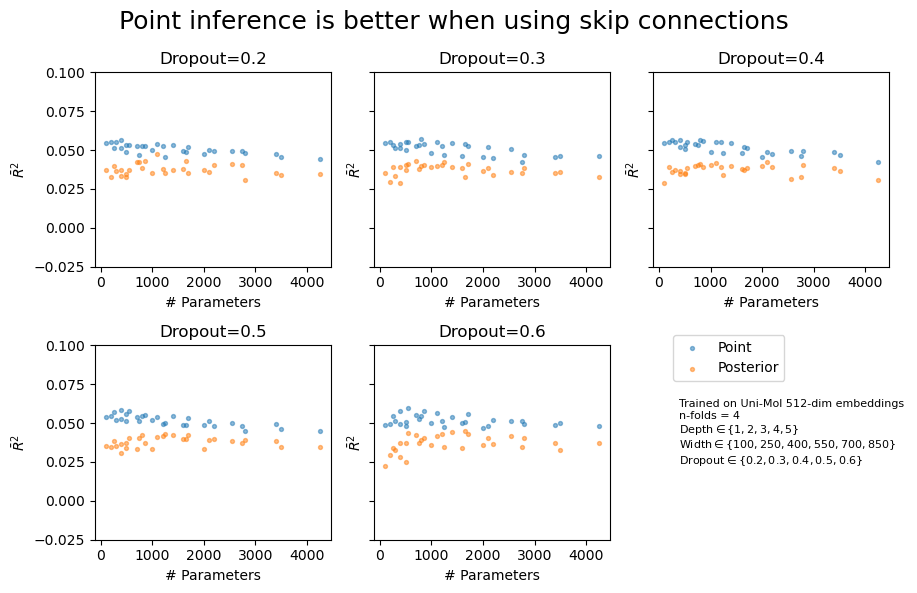

In [7]:
dropouts = np.unique(data['dropout'])

n_rows = n_cols = int(len(dropouts) ** 0.5)
while (n_rows * n_cols) < len(dropouts): n_cols += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
axs = [axs] if len(dropouts) == 1 else axs.flatten()

for ax, dropout in zip(axs, dropouts):
    
    _data = data[data['dropout'] == dropout]
    
    n_parameters = _data['depth'] * _data['width']
    
    ax.scatter(n_parameters, _data['rmlp'], s=8, alpha=0.5, label='Point')
    ax.scatter(n_parameters, _data['rvmlp'], s=8, alpha=0.5, label='Posterior')
    ax.set_ylim((-0.025, 0.1))
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.set_ylabel('$\\bar{R}^2$')

for ax in axs[-(n_rows * n_cols - len(dropouts)):]: ax.axis('off')

fig.suptitle(f'Point inference is better when using skip connections', fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.875, 0.35), loc='lower right')

txt = 'Trained on Uni-Mol 512-dim embeddings \n'
txt += 'n-folds = 4 \n'
txt += 'Depth$\\in \{1, 2, 3, 4, 5\}$\n'
txt += 'Width$\\in \{100, 250, 400, 550, 700, 850\}$\n'
txt += 'Dropout$\\in \{0.2, 0.3, 0.4, 0.5, 0.6\}$\n'
fig.text(0.75, 0.2, txt, fontsize=8)

plt.tight_layout()

## Data Augmentation by Sampling

In [8]:
data = pd.read_csv('hyperparameters_emb512.csv')
data_aug = pd.read_csv('hyperparameters_sampling_emb.csv')

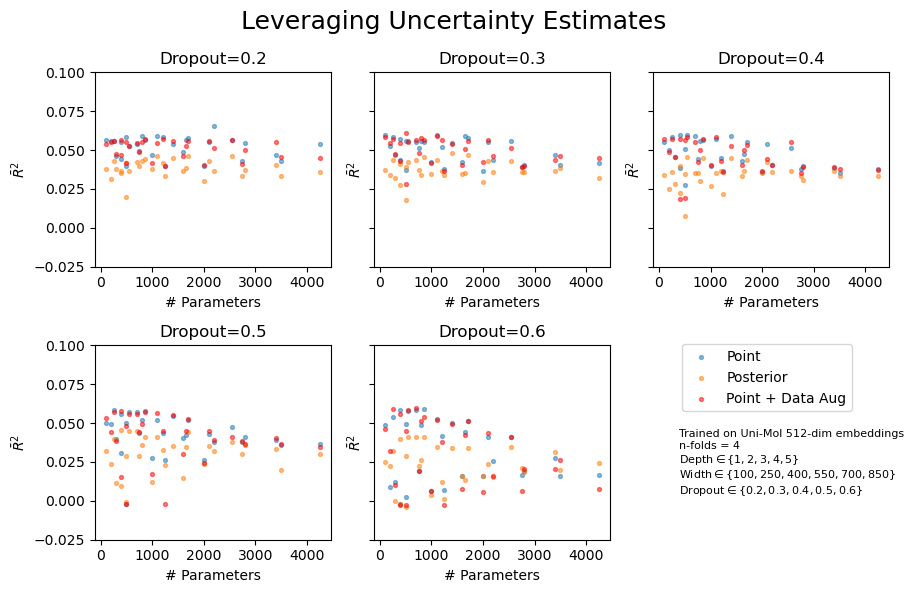

In [9]:
dropouts = np.unique(data['dropout'])

n_rows = n_cols = int(len(dropouts) ** 0.5)
while (n_rows * n_cols) < len(dropouts): n_cols += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
axs = [axs] if len(dropouts) == 1 else axs.flatten()

for ax, dropout in zip(axs, dropouts):
    
    _data = data[data['dropout'] == dropout]
    _data_aug = data_aug[data_aug['dropout'] == dropout]
    
    n_parameters = _data['depth'] * _data['width']
    
    ax.scatter(n_parameters, _data['mlp'], s=8, alpha=0.5, label='Point')
    ax.scatter(n_parameters, _data['vmlp'], s=8, alpha=0.5, label='Posterior')
    ax.scatter(n_parameters, _data_aug['mlp'], s=8, alpha=0.5, c='r', label='Point + Data Aug')
    ax.set_ylim((-0.025, 0.1))
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.set_ylabel('$\\bar{R}^2$')

for ax in axs[-(n_rows * n_cols - len(dropouts)):]: ax.axis('off')

fig.suptitle(f'Leveraging Uncertainty Estimates', fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.95, 0.3), loc='lower right')

txt = 'Trained on Uni-Mol 512-dim embeddings \n'
txt += 'n-folds = 4 \n'
txt += 'Depth$\\in \{1, 2, 3, 4, 5\}$\n'
txt += 'Width$\\in \{100, 250, 400, 550, 700, 850\}$\n'
txt += 'Dropout$\\in \{0.2, 0.3, 0.4, 0.5, 0.6\}$\n'
fig.text(0.75, 0.15, txt, fontsize=8)

plt.tight_layout()

In [10]:
data = pd.read_csv('hyperparameters_emb512.csv')
data_aug = pd.read_csv('hyperparameters_sampling_emb.csv')

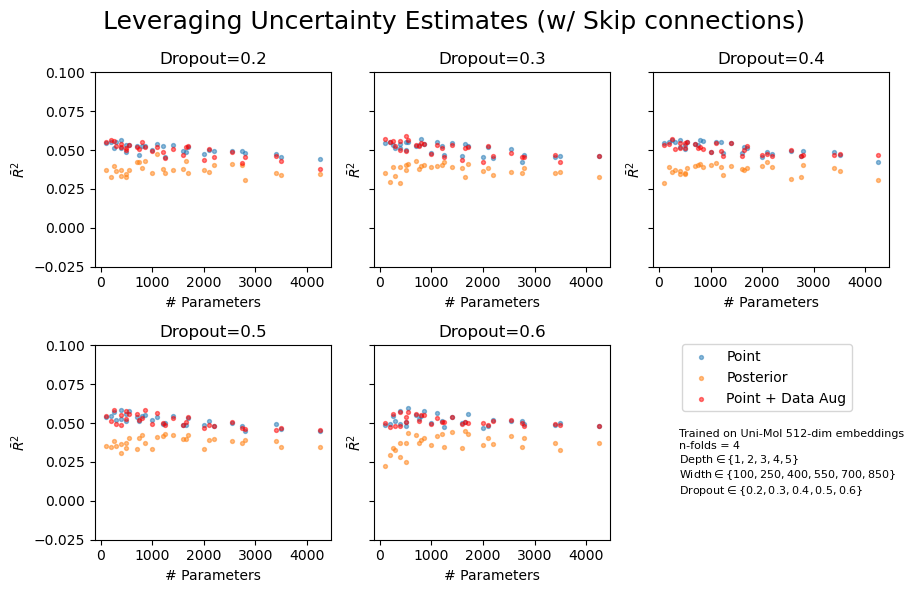

In [11]:
dropouts = np.unique(data['dropout'])

n_rows = n_cols = int(len(dropouts) ** 0.5)
while (n_rows * n_cols) < len(dropouts): n_cols += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
axs = [axs] if len(dropouts) == 1 else axs.flatten()

for ax, dropout in zip(axs, dropouts):
    
    _data = data[data['dropout'] == dropout]
    _data_aug = data_aug[data_aug['dropout'] == dropout]
    
    n_parameters = _data['depth'] * _data['width']
    
    ax.scatter(n_parameters, _data['rmlp'], s=8, alpha=0.5, label='Point')
    ax.scatter(n_parameters, _data['rvmlp'], s=8, alpha=0.5, label='Posterior')
    ax.scatter(n_parameters, _data_aug['rmlp'], s=8, alpha=0.5, c='r', label='Point + Data Aug')
    ax.set_ylim((-0.025, 0.1))
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.set_ylabel('$\\bar{R}^2$')

for ax in axs[-(n_rows * n_cols - len(dropouts)):]: ax.axis('off')

fig.suptitle(f'Leveraging Uncertainty Estimates (w/ Skip connections)', fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.95, 0.3), loc='lower right')

txt = 'Trained on Uni-Mol 512-dim embeddings \n'
txt += 'n-folds = 4 \n'
txt += 'Depth$\\in \{1, 2, 3, 4, 5\}$\n'
txt += 'Width$\\in \{100, 250, 400, 550, 700, 850\}$\n'
txt += 'Dropout$\\in \{0.2, 0.3, 0.4, 0.5, 0.6\}$\n'
fig.text(0.75, 0.15, txt, fontsize=8)

plt.tight_layout()

## Width and Depth

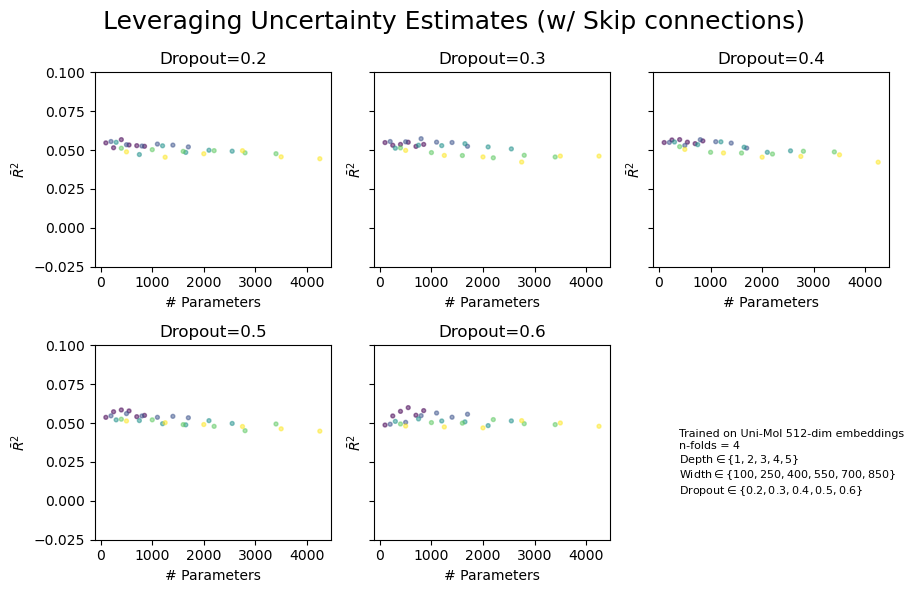

In [15]:
dropouts = np.unique(data['dropout'])

n_rows = n_cols = int(len(dropouts) ** 0.5)
while (n_rows * n_cols) < len(dropouts): n_cols += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
axs = [axs] if len(dropouts) == 1 else axs.flatten()

for ax, dropout in zip(axs, dropouts):
    
    _data = data[data['dropout'] == dropout]
    _data_aug = data_aug[data_aug['dropout'] == dropout]
    
    n_parameters = _data['depth'] * _data['width']
    
    colormap = ax.scatter(n_parameters, _data['rmlp'], s=8, alpha=0.5, c=_data['depth'], label='Point')

    ax.set_ylim((-0.025, 0.1))
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.set_ylabel('$\\bar{R}^2$')

for ax in axs[-(n_rows * n_cols - len(dropouts)):]: ax.axis('off')

fig.suptitle(f'Leveraging Uncertainty Estimates (w/ Skip connections)', fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
#fig.colorbar(colormap)#, bbox_to_anchor=(0.95, 0.3), loc='lower right')

txt = 'Trained on Uni-Mol 512-dim embeddings \n'
txt += 'n-folds = 4 \n'
txt += 'Depth$\\in \{1, 2, 3, 4, 5\}$\n'
txt += 'Width$\\in \{100, 250, 400, 550, 700, 850\}$\n'
txt += 'Dropout$\\in \{0.2, 0.3, 0.4, 0.5, 0.6\}$\n'
fig.text(0.75, 0.15, txt, fontsize=8)

plt.tight_layout()